<a href="https://colab.research.google.com/github/malanban/Assignment-02/blob/main/Assign_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Q1

In [57]:
import cv2 as cv
import numpy as np

# Load the sunflower field image
image = cv.imread('/content/the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)

# Convert the image to grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Create a SimpleBlobDetector object
params = cv.SimpleBlobDetector_Params()

# Set the parameters for blob detection
params.minThreshold = 0
params.maxThreshold = 200
params.filterByArea = True
params.minArea = 45  # Adjust this threshold for the minimum blob area
params.filterByCircularity = True
params.minCircularity = 0.25  # Adjust this threshold for circularity
params.filterByInertia = False
params.filterByConvexity = False

# Create the blob detector with the specified parameters
detector = cv.SimpleBlobDetector_create(params)

# Detect blobs (circles) in the grayscale image
keypoints = detector.detect(gray)

# Draw the detected circles on the original image
im_with_keypoints = cv.drawKeypoints(image, keypoints, np.array([]), (0, 0, 255),
                                      cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with the detected circles
cv.imwrite('Detected_Circles.jpg', im_with_keypoints)

# Report the parameters of the detected circles
i = 0
for keypoint in keypoints:
    x, y = map(int, keypoint.pt)
    radius = int(keypoint.size / 2)
    print(f"Circle: Center({x}, {y}), Radius({radius})")
    i += 1
print(f"Total Circles Detected: {i}")


Circle: Center(94, 339), Radius(9)
Circle: Center(80, 337), Radius(5)
Circle: Center(242, 348), Radius(5)
Circle: Center(346, 337), Radius(5)
Circle: Center(223, 333), Radius(11)
Circle: Center(154, 329), Radius(5)
Circle: Center(178, 327), Radius(10)
Circle: Center(139, 326), Radius(11)
Circle: Center(194, 312), Radius(4)
Circle: Center(272, 294), Radius(6)
Circle: Center(299, 291), Radius(4)
Circle: Center(144, 285), Radius(4)
Circle: Center(94, 289), Radius(8)
Circle: Center(54, 175), Radius(7)
Circle: Center(313, 350), Radius(7)
Circle: Center(60, 333), Radius(5)
Circle: Center(304, 317), Radius(5)
Circle: Center(255, 307), Radius(14)
Circle: Center(160, 290), Radius(7)
Circle: Center(70, 286), Radius(7)
Circle: Center(211, 282), Radius(6)
Circle: Center(59, 273), Radius(5)
Circle: Center(178, 259), Radius(9)
Circle: Center(273, 257), Radius(8)
Circle: Center(106, 255), Radius(10)
Circle: Center(19, 250), Radius(6)
Circle: Center(223, 242), Radius(5)
Circle: Center(63, 242), Radius

#Q2

Estimated line parameters: [-1.0517349293542795, 2.521932966498142]
Number of inliers (line): 10
Estimated circle parameters: [3.054903155108761, 2.120290721580848, 10.132131398318379]
Number of inliers (circle): 33


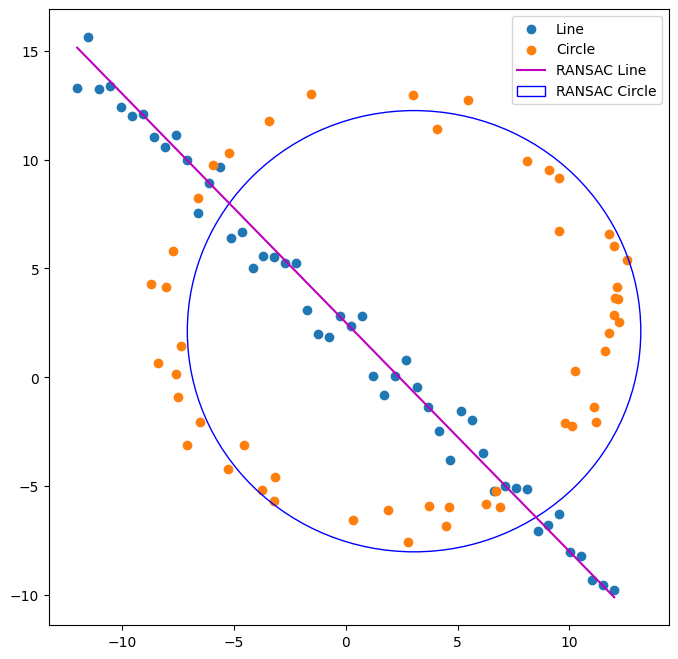

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to ransac line fitting
def ransac_line_fitting(X, distance_threshold, iterations):
    best_model = None
    best_consensus = 0

    for i in range(iterations):
        # Randomly sample 2 points from the data set for line fitting.
        sample_indices = np.random.choice(len(X), size=7, replace=False)
        sampled_points = X[sample_indices]

        # Fit a line to the sampled points using numpy's polyfit.
        coefficients = np.polyfit(sampled_points[:, 0], sampled_points[:, 1], deg=1)
        a, b = coefficients[0], coefficients[1]

        # Calculate the distance of each point in the data set to the fitted line.
        distances = np.abs(X[:, 1] - (a * X[:, 0] + b))

        # Count the number of points in the data set that are within the distance threshold from the fitted line.
        consensus = np.sum(distances < distance_threshold)

        if consensus > best_consensus:
            best_model = [a, b]
            best_consensus = consensus

    return best_model, best_consensus

# Function to ransac circle fitting
def ransac_circle_fitting(X, distance_threshold, iterations):
    best_model_c = None
    best_consensus_c = 0

    for i in range(iterations):
        # Randomly sample 3 points from the data set for circle fitting.
        sample_indices = np.random.choice(len(X), size=5, replace=False)
        sampled_points_c = X[sample_indices]

        # Fit a circle to the sampled points using your `fit_circle` function.
        x_mean, y_mean, r = fit_circle(sampled_points_c[:, 0], sampled_points_c[:, 1])

        # Calculate the distance of each point in the data set to the fitted circle.
        distances_c = np.sqrt((X[:, 0] - x_mean) ** 2 + (X[:, 1] - y_mean) ** 2) - r

        # Count the number of points in the data set that are within the distance threshold of the fitted circle.
        consensus_c = np.sum(distances_c < distance_threshold)

        if consensus_c > best_consensus_c:
            best_model_c = [x_mean, y_mean, r]
            best_consensus_c = consensus_c

    return best_model_c, best_consensus_c

# Function to fit a circle to a set of points
def fit_circle(X, Y):
    x_mean = np.mean(X)
    y_mean = np.mean(Y)
    r = np.mean(np.sqrt((X - x_mean) ** 2 + (Y - y_mean) ** 2))
    return x_mean, y_mean, r

# Set the distance threshold and number of iterations.
distance_threshold = 0.1
num_iterations = 100

# Use the provided data for line and circle fitting.
N = 100
half_n = N//2
r = 10
x0_gt , y0_gt = 2,3 # Center
s = r/16
t = np.random.uniform(0,2*np.pi,half_n)
n = s*np.random.randn(half_n)
x,y = x0_gt+(r+n)*np.cos(t),y0_gt+(r+n)*np.sin(t)
X_circ=np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
s = 1.
m, b = -1, 2
x = np.linspace(-12,12,half_n)
y = m*x+b+s*np.random.randn(half_n)
X_line =np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))


# Run RANSAC for line fitting and circle fitting.
best_model, best_consensus = ransac_line_fitting(X_line, distance_threshold, num_iterations)
best_model_c, best_consensus_c = ransac_circle_fitting(X_circ, distance_threshold, num_iterations)

# Print the estimated line parameters and the number of inliers.
print('Estimated line parameters:', best_model)
print('Number of inliers (line):', best_consensus)

# Print the estimated circle parameters and the number of inliers.
print('Estimated circle parameters:', best_model_c)
print('Number of inliers (circle):', best_consensus_c)

# Plot the data points and fitted line and circle.
plt.figure(figsize=(8, 8))
plt.scatter(X_line[:, 0], X_line[:, 1], label='Line')
plt.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle')
plt.plot(X_line[:, 0], best_model[0] * X_line[:, 0] + best_model[1], color='m', label='RANSAC Line')
circle = plt.Circle((best_model_c[0], best_model_c[1]), best_model_c[2], color='b', fill=False, label='RANSAC Circle')
plt.gca().add_patch(circle)
plt.legend()
plt.show()


Estimated line parameters: [-1.0382031074987006, 1.9153808032153763]
Number of inliers (line): 14
Estimated circle parameters: [1.3964442156472303, 3.10021847434033, 12.131606915313142]
Number of inliers (circle): 86


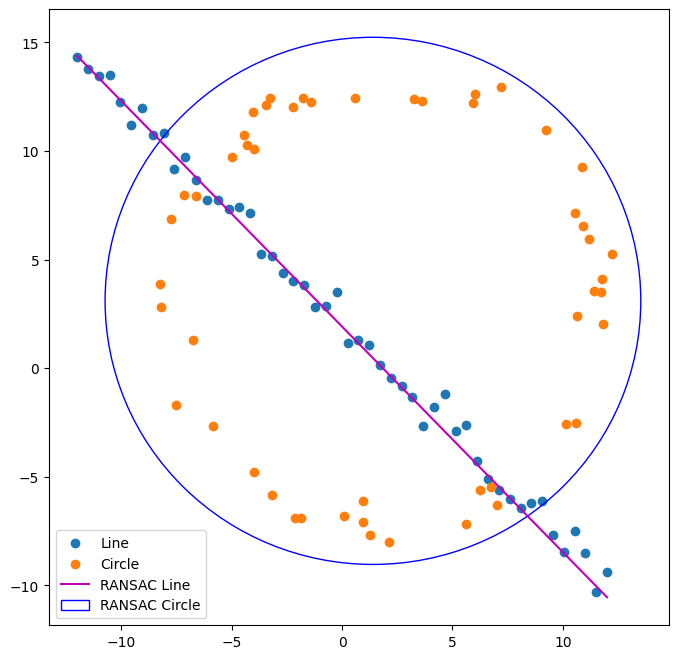

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data for a circle
def generate_circle_data(N, r, x0_gt, y0_gt, s):
    half_n = N // 2
    t = np.random.uniform(0, 2 * np.pi, half_n)
    n = s * np.random.randn(half_n)
    x = x0_gt + (r + n) * np.cos(t)
    y = y0_gt + (r + n) * np.sin(t)
    return np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

# Generate data for a line
def generate_line_data(N, m, b, s):
    half_n = N // 2
    x = np.linspace(-12, 12, half_n)
    y = m * x + b + s * np.random.randn(half_n)
    return np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

# Function to fit a circle to a set of points
def fit_circle(X, Y):
    x_mean = np.mean(X)
    y_mean = np.mean(Y)
    r = np.mean(np.sqrt((X - x_mean) ** 2 + (Y - y_mean) ** 2))
    return x_mean, y_mean, r

# RANSAC for line fitting
def ransac_line_fitting(X, distance_threshold, iterations):
    best_model = None
    best_consensus = 0
    num_points = len(X)

    for i in range(iterations):
        # Randomly sample index of points from the data set.
        index = np.random.choice(num_points, size=3, replace=False)
        sampled_points = X[index]

        # Fit a line to the sampled points using numpy's polyfit.
        coefficients = np.polyfit(sampled_points[:, 0], sampled_points[:, 1], deg=1)
        a, b = coefficients[0], coefficients[1]

        # Calculate the distance of each point in the data set to the fitted line.
        distances = np.abs(X[:, 1] - (a * X[:, 0] + b))

        # Count the number of points in the data set that are within the distance threshold from the fitted line.
        consensus = np.sum(distances < distance_threshold)

        if consensus > best_consensus:
            best_model = [a, b]
            best_consensus = consensus

    return best_model, best_consensus

# RANSAC for circle fitting
def ransac_circle_fitting(X, distance_threshold, iterations):
    best_model_c = None
    best_consensus_c = 0
    num_points = len(X)

    for i in range(iterations):
        # Randomly sample points from the data set for circle fitting.
        index = np.random.choice(num_points, size=8, replace=False)
        sampled_points_c = X[index]

        # Fit a circle to the sampled points using your `fit_circle` function.
        x_mean, y_mean, r = fit_circle(sampled_points_c[:, 0], sampled_points_c[:, 1])

        # Calculate the distance of each point in the data set to the fitted circle.
        distances_c = np.sqrt((X[:, 0] - x_mean) ** 2 + (X[:, 1] - y_mean) ** 2) - r

        # Count the number of points in the data set that are within the distance threshold of the fitted circle.
        consensus_c = np.sum(distances_c < distance_threshold)

        if consensus_c > best_consensus_c:
            best_model_c = [x_mean, y_mean, r]
            best_consensus_c = consensus_c

    return best_model_c, best_consensus_c

# Main code
N = 100
r = 10
x0_gt, y0_gt = 2, 3
s = r / 16
m, b = -1, 2

X_circ = generate_circle_data(N, r, x0_gt, y0_gt, s)
X_line = generate_line_data(N, m, b, s)
X = np.vstack((X_circ, X_line))

# Set the distance threshold and number of iterations.
distance_threshold = 0.1
num_iterations = 1000

# Run RANSAC for line fitting and circle fitting.
best_model, best_consensus = ransac_line_fitting(X, distance_threshold, num_iterations)
best_model_c, best_consensus_c = ransac_circle_fitting(X, distance_threshold, num_iterations)

# Print the estimated line parameters and the number of inliers.
print('Estimated line parameters:', best_model)
print('Number of inliers (line):', best_consensus)

# Print the estimated circle parameters and the number of inliers.
print('Estimated circle parameters:', best_model_c)
print('Number of inliers (circle):', best_consensus_c)

# Plot the data points and fitted line and circle.
plt.figure(figsize=(8, 8))
plt.scatter(X_line[:, 0], X_line[:, 1], label='Line')
plt.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle')
plt.plot(X_line[:, 0], best_model[0] * X_line[:, 0] + best_model[1], color='m', label='RANSAC Line')
circle = plt.Circle((best_model_c[0], best_model_c[1]), best_model_c[2], color='b', fill=False, label='RANSAC Circle')
plt.gca().add_patch(circle)
plt.legend()
plt.show()


#Q3

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

number_of_points = 4
n = 0
p = np.empty((number_of_points, 2), dtype=np.float32)
p_flag = np.empty((number_of_points, 2), dtype=np.float32)

def draw_circle(event, x, y, flags, param):
    global n
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1], (x, y), 5, (255, 0, 0), -1)
        param[0][n] = [x, y]
        n += 1

im = cv.imread('images/002.jpg', cv.IMREAD_COLOR)
im_flag = cv.imread('images/sri lanka.jpg', cv.IMREAD_COLOR)
im_copy = im.copy()
im_flag_copy = im_flag.copy()

# Getting the mouse points of the base image
cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
param = [p, im_copy]
cv.setMouseCallback('Image', draw_circle, param)
while True:
    cv.imshow('Image', im_copy)
    if n == number_of_points:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

# Getting the mouse points of the flag
n = 0
cv.namedWindow('Image Flag', cv.WINDOW_AUTOSIZE)
param = [p_flag, im_flag_copy]
cv.setMouseCallback('Image Flag', draw_circle, param)
while True:
    cv.imshow('Image Flag', im_flag_copy)
    if n == number_of_points:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
cv.destroyAllWindows()

# Compute the homography matrix
h, _ = cv.findHomography(p, p_flag) # Calculating homography between image and flag

# Warp the flag image to match the architectural image using the homography
warped_img = cv.warpPerspective(im_flag, h, (im.shape[1], im.shape[0]))

# Blend the two images
blended = cv.addWeighted(im, 0.6, warped_img, 0.4, 0.0)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(cv.cvtColor(blended, cv.COLOR_BGR2RGB))

# Plotting the results
fig, ax = plt.subplots(1, 3, figsize=(21, 7))
ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0].set_title("Source Image")
ax[1].imshow(cv.cvtColor(im_flag, cv.COLOR_BGR2RGB))
ax[1].set_title("Flag Image")
ax[2].imshow(cv.cvtColor(warped_img, cv.COLOR_BGR2RGB))
ax[2].set_title("Image Warped")

plt.show()


In [ ]:
import cv2
import numpy as np

number_of_points = 4
n = 0
architectural_points = np.empty((number_of_points,2))

# Load your architectural image and flag image
architectural_image = cv.imread('images/002.jpg', cv.IMREAD_COLOR)
flag_image = cv.imread('images/sri lanka.jpg', cv.IMREAD_COLOR)

# Mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    architectural_points = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)
        architectural_points[n] = (x,y)
        n += 1

# Getting the mouse points of the base image
cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
param = [architectural_points, architectural_image]
cv.setMouseCallback('Image',draw_circle, param)
while(1):
    cv.imshow('Image', architectural_image)
    if n == number_of_points:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

# Define the corresponding points on the flag image
# These points should form a rectangle to match the planar surface
flag_points = np.array([[0, 0], [flag_image.shape[1], 0], [flag_image.shape[1], flag_image.shape[0]], [0, flag_image.shape[0]]], dtype=np.float32)

# Compute the homography matrix
homography_matrix, _ = cv2.findHomography(flag_points, architectural_points)

# Warp the flag image to match the architectural image using the homography
flag_warped = cv2.warpPerspective(flag_image, homography_matrix, (architectural_image.shape[1], architectural_image.shape[0]))

# Blend the two images (you can adjust the blending method and parameters)
blended_image = cv2.addWeighted(architectural_image, 1, flag_warped, 0.7, 0)

# Display the result
cv2.imshow('Superimposed Image', blended_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#Q4

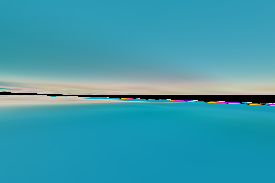

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the images
img1 = cv2.imread('/content/img1.png')
img5 = cv2.imread('/content/img2.png')

# Create a SIFT feature detector
sift = cv2.SIFT_create()

# Detect SIFT features and compute descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp5, des5 = sift.detectAndCompute(img5, None)

# Create a Brute-Force Matcher
bf = cv2.BFMatcher()

# Match descriptors
matches = bf.knnMatch(des1, des5, k=2)

# Apply Lowe's ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

if len(good_matches) > 10:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp5[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Find the homography matrix
    H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 2)

    # Warp the first image onto the second image
    result = cv2.warpPerspective(img1, H, (img5.shape[1], img5.shape[0]))


    # Display the stitched image
    cv2_imshow(result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Or save the result
    cv2.imwrite('stitched_image.ppm', result)
else:
    print("Not enough good matches to create a stitched image.")


In [ ]:
import cv2
import numpy as np

# Load the images
img1 = cv2.imread('/content/img1.png')
img5 = cv2.imread('/content/img2.png')

# Load the ground truth homography matrix from the dataset
ground_truth_H = np.array([[0.62652341, -0.77806238, 437.18953615],
                           [0.79858411, 0.58136985, -42.86916264],
                           [0.00493614, -0.22203409, 1.]])

# Create a SIFT feature detector
sift = cv2.SIFT_create()

# Detect SIFT features and compute descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp5, des5 = sift.detectAndCompute(img5, None)

# Create a Brute-Force Matcher
bf = cv2.BFMatcher()

# Match descriptors
matches = bf.knnMatch(des1, des5, k=2)

# Apply Lowe's ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

if len(good_matches) > 10:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp5[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Compute the homography matrix using RANSAC
    H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 2.0)

    # Compare the computed homography with the ground truth
    print("Computed Homography:")
    print(H)
    print("\nGround Truth Homography:")
    print(ground_truth_H)

else:
    print("Not enough good matches to compute the homography.")

# Calculate the mean absolute error between the computed and ground truth homographies
mean_absolute_error = np.mean(np.abs(H - ground_truth_H))
print(f"\nMean Absolute Error: {mean_absolute_error}")


Computed Homography:
[[-2.64890572e-01  2.31857922e+00  2.17317576e+01]
 [-5.88015262e-01  8.32071795e-01  9.42026596e+01]
 [-6.24298640e-03  8.09915397e-03  1.00000000e+00]]

Ground Truth Homography:
[[ 6.26523410e-01 -7.78062380e-01  4.37189536e+02]
 [ 7.98584110e-01  5.81369850e-01 -4.28691626e+01]
 [ 4.93614000e-03 -2.22034090e-01  1.00000000e+00]]

Mean Absolute Error: 62.04403000720367


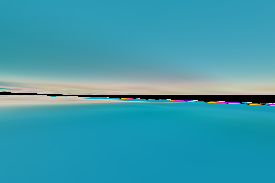

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the images
img1 = cv2.imread('/content/img1.png')
img5 = cv2.imread('/content/img2.png')

# Warp the first image onto the second image using the computed homography
result = cv2.warpPerspective(img1, H, (img5.shape[1], img5.shape[0]))

# Display the stitched image
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Or save the result
cv2.imwrite('stitched_image.ppm', result)


In [ ]:
# Define the corresponding points on the flag image
# These points should form a rectangle to match the planar surface
flag_points = np.array([[0, 0], [flag_image.shape[1], 0], [flag_image.shape[1], flag_image.shape[0]], [0, flag_image.shape[0]]], dtype=np.float32)

# Compute the homography matrix
homography_matrix, _ = cv2.findHomography(flag_points, architectural_points)

# Warp the flag image to match the architectural image using the homography
flag_warped = cv2.warpPerspective(flag_image, homography_matrix, (architectural_image.shape[1], architectural_image.shape[0]))

# Blend the two images (you can adjust the blending method and parameters)
blended_image = cv2.addWeighted(architectural_image, 1, flag_warped, 0.7, 0)